In [3]:
import numpy as np
import torch as tr

from Nback_tasks import NbackTask_Basic
from Nback_models import PureWM
# from Nback_helper import *

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size':22})

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

### todo
- train on 13back

# load and eval

(0.95, 1.001)

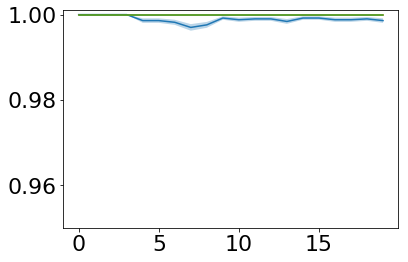

In [8]:
from glob import glob as glob
seed = '*'
nback = '1' # 1 or 3
fpathL = glob("model_data/pureWM-control_train_sets/evalscore-nback_%s-seed_%s.npy"%(nback,seed))
acc = -np.ones([3,20])
accst = -np.ones([3,20])
for idx,fpath in enumerate(fpathL):
  sub_score = np.load(fpath)
  acc[idx] = sub_score.mean(0)
  accst[idx] = sub_score.std(0)/np.sqrt(5000)
plt.plot(acc.T)
for i in range(3):
  plt.fill_between(range(20),acc[i]-accst[i],acc[i]+accst[i],alpha=.3)
plt.ylim(.95,1.001)

# scratch

In [2]:
seed = 0
np.random.seed(seed)
tr.manual_seed(seed)

In [3]:
nback = 1
ntokens = 3
edim = 50
task = NbackTask_Basic(nback,ntokens,edim,seed)
stsize = 20
net = PureWM(edim,stsize,seed)

## train

In [6]:
acc,target_nsets = cloop_train(net,task,nepochs=100000,thresh=.99)
print(target_nsets)

KeyboardInterrupt: 

## eval

In [ ]:
eval_score = eval_(net,task,neps=5000)
eval_acc = eval_score.mean(0)
plt.plot(eval_acc)

## train til target nsets

In [ ]:
nback = 2
ntokens = 3
edim = 20
task = NbackTask_Basic(nback,ntokens,edim,seed)
stsize = 20
net = PureWM(edim,stsize,seed)

In [ ]:
nepochs = nsets_train(net,task,target_nsets,thresh=.99)
print(nepochs)

In [ ]:
eval_score = eval_(net,task,neps=5000)
eval_acc = eval_score.mean(0)
plt.plot(eval_acc)
plt.scatter(range(len(eval_acc)),eval_acc)